<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/main/Data/ad_click_dataset.csv")

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [29]:
train_set.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [30]:
train_set = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [31]:
test_set = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [32]:
X_train = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_train = train_set['click']

In [33]:
X_test = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_test = test_set['click']

Work on the stuff below

In [34]:
num_attributes = X_train.select_dtypes( include = ['float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [35]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [36]:
oldpipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=5))])

In [37]:
cross_val_score( oldpipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.65375 , 0.664375, 0.655   , 0.663125, 0.665625])

In [38]:
oldmodel = oldpipeline.fit( X_train, y_train )
oldmodel

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [39]:
oldpredictions = oldpipeline.predict( X_test )

In [40]:
oldcm = confusion_matrix(y_test, oldpredictions)

In [41]:
oldcm

array([[  89,  610],
       [  66, 1235]])

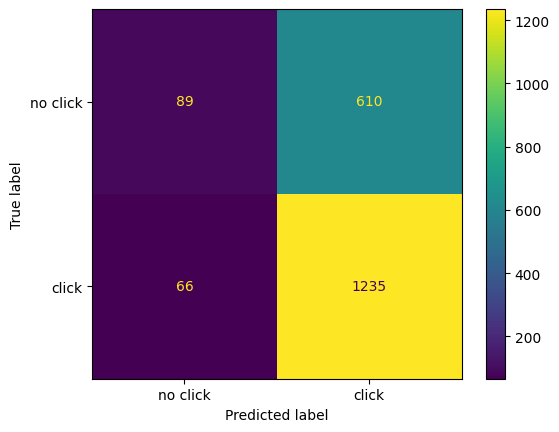

In [42]:
ConfusionMatrixDisplay(oldcm, display_labels=["no click", "click"]).plot()

In [43]:
oldRecall = metrics.recall_score(y_test, oldpredictions)

In [44]:
oldPrecision = metrics.precision_score(y_test, oldpredictions)

In [45]:
oldF1 = metrics.f1_score(y_test, oldpredictions)

In [46]:
oldAccuracy = metrics.accuracy_score(y_test, oldpredictions)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {
    'clf__max_leaf_nodes': list(range(2, 10)),
    'clf__max_depth': list(range(1, 7)),
    'clf__min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(oldpipeline,
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                                       ('clf',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'clf__max_depth': [1, 2, 3, 4, 5, 6],
                         'clf__max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__min_samples_split': [2, 3, 4]})

In [49]:
grid_search_cv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8))])

In [51]:
grid_search_cv.best_params_

{'clf__max_depth': 4, 'clf__max_leaf_nodes': 8, 'clf__min_samples_split': 2}

In [64]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_split=2))])

In [65]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.661875, 0.66625 , 0.65125 , 0.655   , 0.6575  ])

In [66]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8))])

In [74]:
predictions = grid_search_cv.predict(X_test)

In [75]:
cm = confusion_matrix(y_test, predictions)
cm

array([[  52,  647],
       [  39, 1262]])

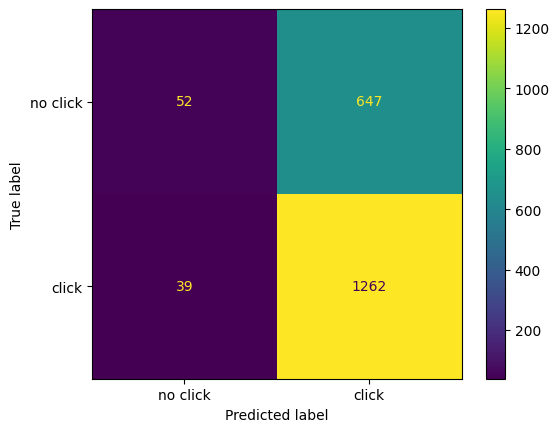

In [76]:
ConfusionMatrixDisplay(cm, display_labels=["no click", "click"]).plot()

[Text(0.4230769230769231, 0.9, 'x[0] <= 0.671\ngini = 0.455\nsamples = 8000\nvalue = [2801, 5199]'),
 Text(0.15384615384615385, 0.7, 'x[0] <= -2.267\ngini = 0.443\nsamples = 6577\nvalue = [2182, 4395]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.295\nsamples = 39\nvalue = [32, 7]'),
 Text(0.23076923076923078, 0.5, 'x[15] <= 0.5\ngini = 0.441\nsamples = 6538\nvalue = [2150, 4388]'),
 Text(0.15384615384615385, 0.3, 'x[9] <= 0.5\ngini = 0.435\nsamples = 5912\nvalue = [1894.0, 4018.0]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.446\nsamples = 4240\nvalue = [1423, 2817]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.405\nsamples = 1672\nvalue = [471, 1201]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.483\nsamples = 626\nvalue = [256, 370]'),
 Text(0.6923076923076923, 0.7, 'x[0] <= 2.454\ngini = 0.492\nsamples = 1423\nvalue = [619.0, 804.0]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 1.195\ngini = 0.488\nsampl

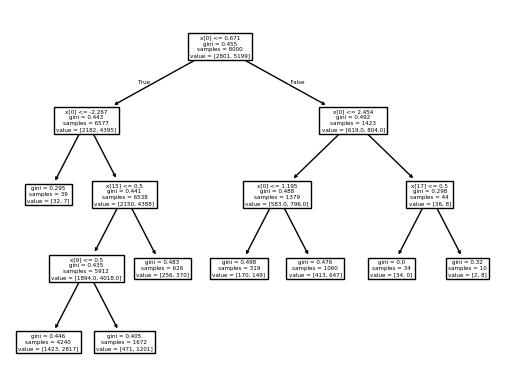

In [77]:
plot_tree( pipeline.named_steps['clf'])

In [78]:
recall = metrics.recall_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)

In [79]:
print("Recall: ", recall)
print("Precision: ", precision)
print("F1: ", f1)
print("Accuracy: ", accuracy)

Recall:  0.9700230591852421
Precision:  0.6610790990047145
F1:  0.7862928348909657
Accuracy:  0.657


In [73]:
print("Old Recall: ", oldRecall)
print("Old Precision: ", oldPrecision)
print("Old F1: ", oldF1)
print("Old Accuracy: ", oldAccuracy)

Old Recall:  0.9492697924673328
Old Precision:  0.6693766937669376
Old F1:  0.7851239669421488
Old Accuracy:  0.662


In [80]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train.iloc[mini_train_index]
    y_mini_train = y_train.iloc[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [82]:
from sklearn.base import clone
import numpy as np

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.5902004999999999

In [83]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [84]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [85]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.652